# Import modules

In [100]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

# Load the data

In [88]:
def load_data(path):
    data_pd = pd.read_csv(path, header = None)
    data = data_pd.values
    X_inital = data[:,:-1]
    X = np.append(np.ones((X_inital.shape[0],1)) , X_inital, axis = 1) # Add a column of ones to x

    Y = data[:,-1].reshape(-1,1)
    
    return data, X, Y

data, X, Y = load_data("ex1data2.txt")

m = X.shape[0]
dim = X.shape[1]

In [89]:
print('data shape:', data.shape)
print('X shpae:', X.shape)
print('Y shape:', Y.shape)
print('m:', m)
print('dim:', dim)



data shape: (47, 3)
X shpae: (47, 3)
Y shape: (47, 1)
m: 47
dim: 3


# Visualize the data

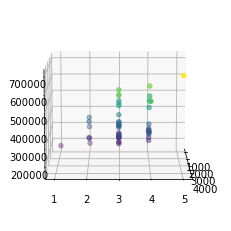

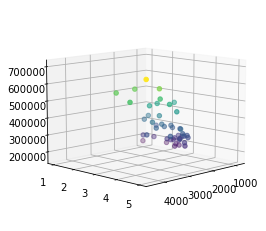

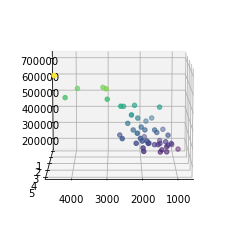

In [91]:
for i in range(0,91,45):
    fig = plt.figure()
    ax = plt.axes(projection ='3d')
    ax.view_init(10, i)
    ax.scatter(data[:,0], data[:,1], data[:,2], c = data[:,2])

# Feature normalization

In [107]:
def feature_normalization(X):
    mu = 0
    sigma = 0
    mu = np.mean(X[:, 1:], axis = 0)
    mu = mu.reshape(-1,1).T
    sigma = np.std(X[:, 1:], axis = 0)
    sigma = sigma.reshape(-1,1).T

    X_norm = np.copy(X)
    X_norm[:,1:] = (X[:,1:] - mu) / sigma
    
    return X_norm, mu, sigma

X_norm, mu, sigma = feature_normalization(X)

print('mu:',mu)
print('sigma:', sigma)


mu: [[2000.68085106    3.17021277]]
sigma: [[7.86202619e+02 7.52842809e-01]]


Expected output:
"mu: [[2000.68085106    3.17021277]] <break>
sigma: [[7.86202619e+02 7.52842809e-01]]"

# Initial parameters

In [93]:
alpha = 0.01;
num_iters = 400;
theta = np.zeros((3, 1));

# Compute cost

In [108]:
def compute_cost(X,Y, theta):
    m = X.shape[0]
    J = 0

    h = np.dot(X, theta)
    J = (1/(2*m)) * np.sum(np.power(h-Y,2))
    return J

cost = compute_cost(X_norm,Y,theta)
print('cost:', cost)

cost: 2105448288.6292474


Expected output: "cost: 2105448288.6292474"



# Gradient descent

In [95]:
def gradient_descent(X, Y, theta, alpha, iteration):
    m = X.shape[0]
    history = np.zeros(iteration)
    for i in range(iteration):
        h = np.dot(X, theta)

        gradJ = (1/m) * np.dot(X.T, h-Y)
        theta = theta - alpha * gradJ
        
        history[i] = compute_cost(X, Y, theta)
        
    return theta, history

theta, history = gradient_descent(X_norm, Y, theta, alpha, num_iters)

In [109]:
cost = compute_cost(X_norm,Y,theta)
print('cost:', cost)
print('theta:', theta)

cost: 2105448288.6292474
theta: [[334302.06399328]
 [ 99411.44947359]
 [  3267.01285407]]


Expected output: "cost: 2105448288.6292474
theta: [[334302.06399328]
 [ 99411.44947359]
 [  3267.01285407]]"

# visualize cost function

Text(0, 0.5, 'Cost')

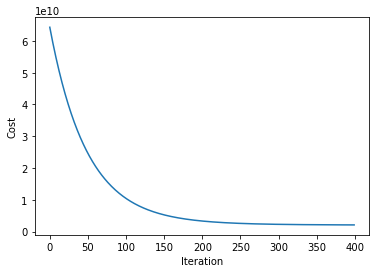

In [97]:
plt.plot(history)
plt.xlabel("Iteration")
plt.ylabel("Cost")

# predict

In [110]:
def predict(x, theta, mu, sigma):
    x_norm = (x - mu) / sigma
    x_new = np.append(1, x_norm).reshape(1,-1)
    price = np.dot(x_new, theta)
    return price[0,0]

x = np.array([[1650,3]])
price = predict(x, theta, mu, sigma)
print('price:', price)

price: 289221.5473712181


Expected output:  "price: 289221.5473712181
"